<a href="https://colab.research.google.com/github/aitorvv/road_to_AI/blob/main/Tensorflow/Zero_to_Mastery/on_air_notebooks/03_intro_to_computer_vision_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks (CNN) and Computer Vision with TensorFlow

## Get the data

We will start with a small dataset to experiment. Data structure:
- test
  - pizza
  - steak
- train
  - pizza
  - steak

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-03-10 14:43:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.7MB/s    in 3.2s    

2023-03-10 14:44:00 (32.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

That means to visualize many samples of the data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Mar 10 09:40 .
drwxr-xr-x 1 root root 4096 Mar 10 09:40 ..
drwxr-xr-x 4 root root 4096 Mar 10 09:40 test
drwxr-xr-x 4 root root 4096 Mar 10 09:40 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names for the subdirectories
# if you have a .DS_Store on the class_names, you can remove it by writting:
# class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # show the shape of the image

  return img

Image shape: (512, 512, 3)


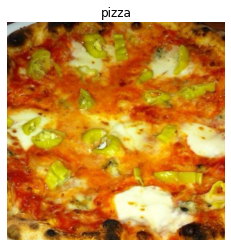

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)  # Convert images into tensors

NameError: ignored

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1 (normalization)
img/255.

array([[[0.21568627, 0.10588235, 0.09019608],
        [0.22745098, 0.11764706, 0.10588235],
        [0.22745098, 0.12941176, 0.11372549],
        ...,
        [0.25490196, 0.09411765, 0.01568627],
        [0.25882353, 0.09803922, 0.01960784],
        [0.2627451 , 0.10196078, 0.02352941]],

       [[0.20392157, 0.10588235, 0.09019608],
        [0.2       , 0.10196078, 0.08627451],
        [0.2       , 0.10588235, 0.09803922],
        ...,
        [0.25882353, 0.09803922, 0.01960784],
        [0.25882353, 0.09803922, 0.01960784],
        [0.25882353, 0.09803922, 0.01960784]],

       [[0.22352941, 0.14117647, 0.12156863],
        [0.22352941, 0.14117647, 0.12941176],
        [0.22352941, 0.14509804, 0.14117647],
        ...,
        [0.25490196, 0.09411765, 0.01568627],
        [0.25098039, 0.09019608, 0.01176471],
        [0.24705882, 0.08627451, 0.00784314]],

       ...,

       [[0.8       , 0.78039216, 0.61568627],
        [0.76862745, 0.74117647, 0.57647059],
        [0.72941176, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our trainig data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1 - normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 225ms/step - loss: 0.5746 - accuracy: 0.7087 - val_loss: 0.4614 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4829 - accuracy: 0.7880 - val_loss: 0.4205 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4258 - accuracy: 0.8180 - val_loss: 0.3615 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3816 - accuracy: 0.8340 - val_loss: 0.3724 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3244 - accuracy: 0.8700 - val_loss: 0.3975 - val_accuracy: 0.8120


- Without GPU:

Epoch 1/5
47/47 [==============================] - 134s 3s/step - loss: 0.6068 - accuracy: 0.6560 - val_loss: 0.3898 - val_accuracy: 0.8340



- With GPU

Epoch 1/5
47/47 [==============================] - 23s 252ms/step - loss: 0.5548 - accuracy: 0.7200 - val_loss: 0.4641 - val_accuracy: 0.7740

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

To read: [CNN explainer](https://poloclub.github.io/cnn-explainer/)

## Using the same model as before


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model to replicate the TF Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.8326 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 11s 190ms/step - loss: 3.0661 - accuracy: 0.6400 - val_loss: 1.1463 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 1.5817 - accuracy: 0.6640 - val_loss: 1.0365 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.8722 - accuracy: 0.7373 - val_loss: 0.4953 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5348 - accuracy: 0.7760 - val_loss: 0.4809 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5340 - accuracy: 0.7733 - val_loss: 0.4816 - val_accuracy: 0.7640


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


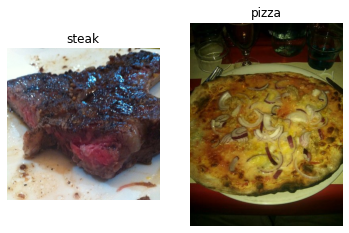

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory datasets paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fir into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode='binary', # Type of data you are working with
                                               batch_size=32) # Size of minibatches to load data into
                                               
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model (start with a baseline)

A baseline is a relatively simple model that you seup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    
    # Initial parameters explanation on CNN Explainer
    Conv2D(filters=10, # filter should pass over an input tensor
           kernel_size=3, # determines the shape of the filters over the output
           strides=1, # number of steps a filter takes across an image at a time
           padding='same', # pads the target tensor with zeroes to preserve input shape ('same') or leaves target tensor as is lowering output shape ('valid')
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of trainint and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 271ms/step - loss: 2.2186 - accuracy: 0.5993 - val_loss: 0.5544 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 13s 268ms/step - loss: 0.5175 - accuracy: 0.7713 - val_loss: 0.4389 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 12s 264ms/step - loss: 0.4107 - accuracy: 0.8280 - val_loss: 0.3618 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3152 - accuracy: 0.8727 - val_loss: 0.3784 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2211 - accuracy: 0.9320 - val_loss: 0.4373 - val_accuracy: 0.7980


### 5. Evaluating our model
Let's evaluate our model

<AxesSubplot:>

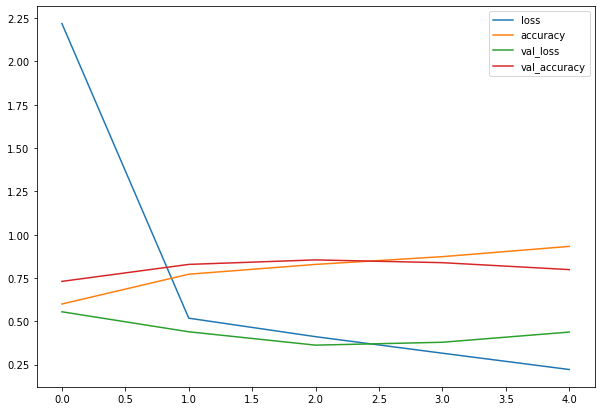

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


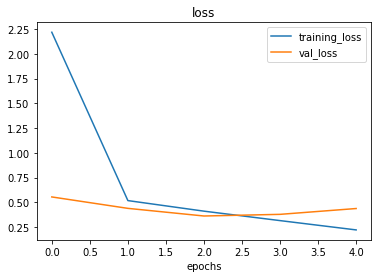

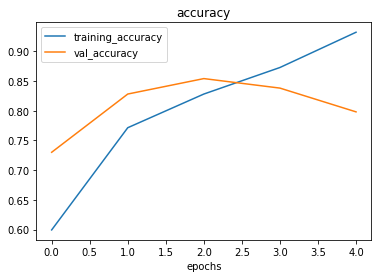

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
- increase the number of conv layers
- increase the numbers of conv filters
- add another dense layer to the output of our flattened layer

Reduce overfitting:
- add data augmentation
- add regularization layers (such as MaxPool2D)
- add more data...

*** reducing overfitting is also known as regularization

In [ ]:
# Create the model (new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


In [ ]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data)) 

Epoch 1/5
47/47 [==============================] - 12s 199ms/step - loss: 0.6125 - accuracy: 0.6933 - val_loss: 0.5103 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4678 - accuracy: 0.8000 - val_loss: 0.4646 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4505 - accuracy: 0.7980 - val_loss: 0.3773 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4189 - accuracy: 0.8233 - val_loss: 0.3707 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3808 - accuracy: 0.8380 - val_loss: 0.3291 - val_accuracy: 0.8780


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

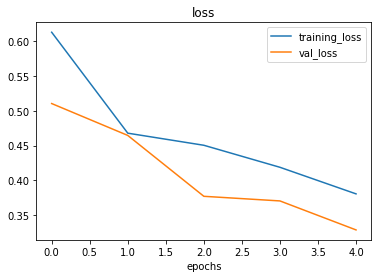

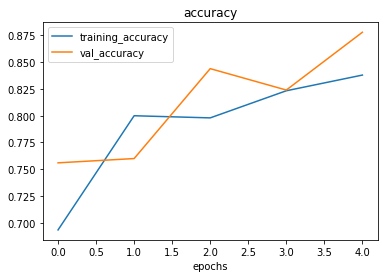

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear/cut an image?
                                             zoom_range=0.2, # zoom in randomly in an image
                                             width_shift_range=0.2, # move your image around on x axis
                                             height_shift_range=0.3, # move your image around on y axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjuting the rotation, zoom, flip...

Let's visualize it:

In [ ]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32, 
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32, 
                                              class_mode='binary',
                                              shuffle=False)

# Create non-augmented test data batches
print('Non.augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32, 
                                            class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non.augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get some sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented

showing image number: 30


(-0.5, 223.5, 223.5, -0.5)

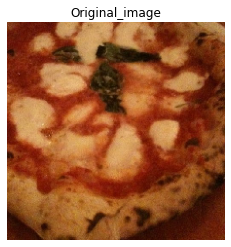

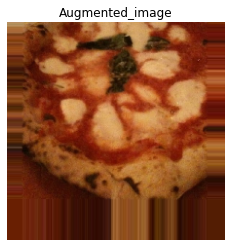

In [ ]:
# Show the original and augmented images
import random
random_number = random.randint(0, 31) # our batch sizes are 32...
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original_image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented_image')
plt.axis(False)

Let's fit a model with augmented data

In [ ]:
# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_6 = model_6.fit(train_data_augmented, 
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 502ms/step - loss: 0.7581 - accuracy: 0.4593 - val_loss: 0.6813 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6952 - accuracy: 0.5093 - val_loss: 0.6722 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6837 - accuracy: 0.5947 - val_loss: 0.6429 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 26s 559ms/step - loss: 0.6425 - accuracy: 0.6387 - val_loss: 0.5384 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 32s 687ms/step - loss: 0.6175 - accuracy: 0.6620 - val_loss: 0.4934 - val_accuracy: 0.8220


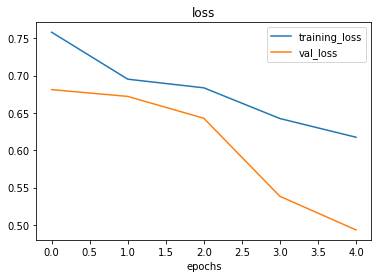

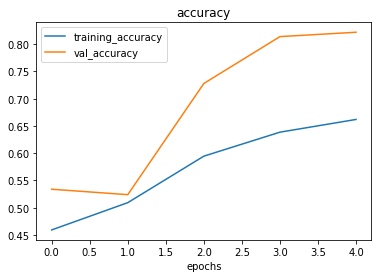

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let0s shuffle our augmented training data and train another mdoel (the same as before) and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True)



Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5/6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 24s 490ms/step - loss: 0.6395 - accuracy: 0.6320 - val_loss: 0.5239 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 23s 491ms/step - loss: 0.5548 - accuracy: 0.7147 - val_loss: 0.4277 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 23s 485ms/step - loss: 0.5191 - accuracy: 0.7433 - val_loss: 0.3757 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5037 - accuracy: 0.7520 - val_loss: 0.4707 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5011 - accuracy: 0.7560 - val_loss: 0.5232 - val_accuracy: 0.7620


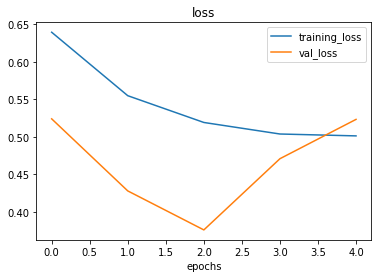

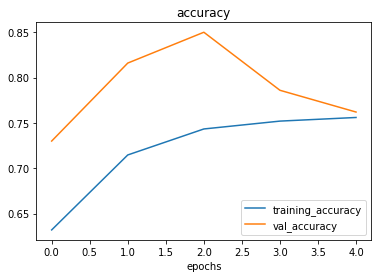

In [ ]:
# Plos loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

- Increase the number of model layers
- Increase the number of filters in each convolutional layer
- Train for longer (more epochs)
- Find an ideal learning rate
- Get more data (give the model more opportunities to learn)
- User **transfer learning** to leverage what another image model has learn and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-03-10 11:11:52--  https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.4’

03-steak.jpeg.4     100%[===================>]   1.89M  --.-KB/s    in 0.006s  

2023-03-10 11:11:52 (290 MB/s) - ‘03-steak.jpeg.4’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

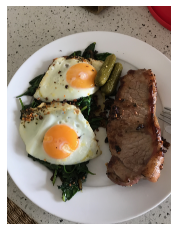

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

model_7.predict(expanded_steak) # error

ValueError: ignored

It's important to preprocess your data on the same way as the model you are using did it

In [ ]:
# Create a function to import an image and resize it to be able to be used by the model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# prediction
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 30ms/step


array([[0.8444824]], dtype=float32)

Looks like our custom image is being put through our model,
however, it currently outputs a prediction probability, 
wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)


1/1 [==============================] - 0s 32ms/step


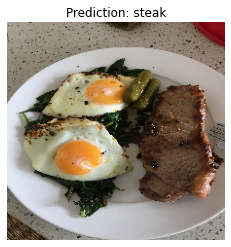

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg', class_names)

--2023-03-10 11:36:30--  https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-03-10 11:36:30 (212 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 33ms/step


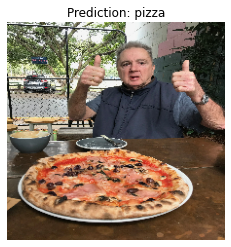

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (tru to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-03-10 14:44:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.6MB/s    in 13s     

2023-03-10 14:44:23 (36.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "10_food_classes_all_data".
There are 10 directories and 0 images in "10_food_classes_all_data/train".
There are 0 directories and 750 images in "10_food_classes_all_data/train/steak".
There are 0 directories and 750 images in "10_food_classes_all_data/train/ice_cream".
There are 0 directories and 750 images in "10_food_classes_all_data/train/chicken_wings".
There are 0 directories and 750 images in "10_food_classes_all_data/train/pizza".
There are 0 directories and 750 images in "10_food_classes_all_data/train/hamburger".
There are 0 directories and 750 images in "10_food_classes_all_data/train/fried_rice".
There are 0 directories and 750 images in "10_food_classes_all_data/train/sushi".
There are 0 directories and 750 images in "10_food_classes_all_data/train/ramen".
There are 0 directories and 750 images in "10_food_classes_all_data/train/grilled_salmon".
There are 0 directories and 750 images in "10_food_classes_all_data/train/chicken_curry".

In [ ]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# Let's import the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


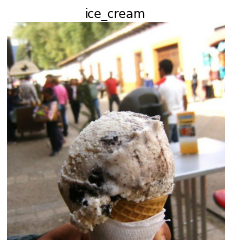

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with the baseline)

We've been talking a lot about the CNN explainer website... How about we just take their model (also on 10 classes) and use it for our problem...?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create the model
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # 10 output neurons and softmax
])

# Compile the model
model_8.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


### 4. Fit a model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 64s 228ms/step - loss: 2.1124 - accuracy: 0.2255 - val_loss: 1.9478 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.8265 - accuracy: 0.3695 - val_loss: 1.9081 - val_accuracy: 0.3336
Epoch 3/5
235/235 [==============================] - 51s 215ms/step - loss: 1.4744 - accuracy: 0.5068 - val_loss: 2.0181 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.9179 - accuracy: 0.7021 - val_loss: 2.4947 - val_accuracy: 0.3020
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.3932 - accuracy: 0.8775 - val_loss: 3.3246 - val_accuracy: 0.2808


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 14s 167ms/step - loss: 3.3246 - accuracy: 0.2808


[3.324591875076294, 0.2808000147342682]

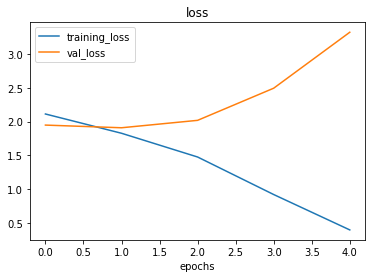

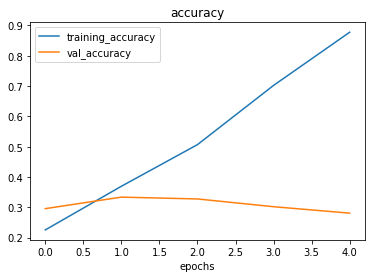

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

It seems our model is overfitting. It's getting great results on the training data but fails on the test data

### 6. Adjust the model hyperparameters (to bet the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something... however, it's not generalizing well to unseen data (overfitting)

Let's try and fix overfitting by...
- Get more data
- Simplify the model
- Use data augmentation
- Use transfer learning

In [ ]:
# Trying to simplify our model
model_8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# Create the model
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 57s 231ms/step - loss: 2.1085 - accuracy: 0.2424 - val_loss: 1.9671 - val_accuracy: 0.2968
Epoch 2/5
235/235 [==============================] - 49s 209ms/step - loss: 1.7631 - accuracy: 0.3957 - val_loss: 1.8308 - val_accuracy: 0.3572
Epoch 3/5
235/235 [==============================] - 47s 198ms/step - loss: 1.2909 - accuracy: 0.5865 - val_loss: 1.9958 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 49s 209ms/step - loss: 0.7558 - accuracy: 0.7704 - val_loss: 2.2337 - val_accuracy: 0.3336
Epoch 5/5
235/235 [==============================] - 61s 259ms/step - loss: 0.3802 - accuracy: 0.9012 - val_loss: 2.5639 - val_accuracy: 0.3352


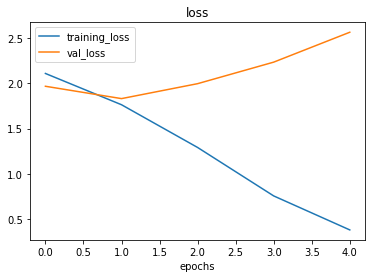

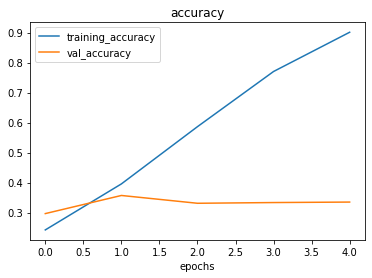

In [ ]:
# check the loss curves
plot_loss_curves(history_9)

### Let's try data augmentation to reduce overfitting

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model fitted with augmented data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the model
model_10.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [ ]:
model_10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 132s 552ms/step - loss: 2.2634 - accuracy: 0.1460 - val_loss: 2.1405 - val_accuracy: 0.2172
Epoch 2/5
235/235 [==============================] - 131s 556ms/step - loss: 2.1089 - accuracy: 0.2379 - val_loss: 1.9507 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 116s 493ms/step - loss: 2.0154 - accuracy: 0.2949 - val_loss: 1.8804 - val_accuracy: 0.3592
Epoch 4/5
235/235 [==============================] - 117s 498ms/step - loss: 1.9521 - accuracy: 0.3203 - val_loss: 1.9047 - val_accuracy: 0.3496
Epoch 5/5
235/235 [==============================] - 116s 495ms/step - loss: 1.9217 - accuracy: 0.3355 - val_loss: 1.7943 - val_accuracy: 0.3816


In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.7943 - accuracy: 0.3816


[1.7943177223205566, 0.3815999925136566]

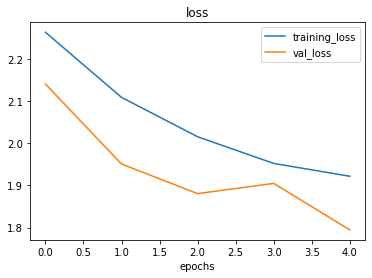

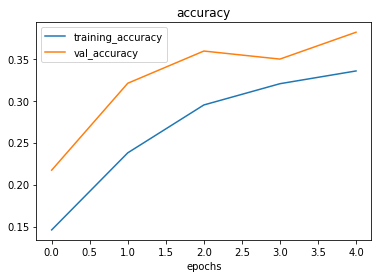

In [ ]:
# Check out curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied

Run more experiments:
- restructuring model's architecture
- adjust learning rate
- try different methods of data augmentation
- training for longer
- try transfer learning

### Making a prediction with our trained model

In [ ]:
# Remind ourselves the classes
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-03-10 15:49:47--  https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-03-10 15:49:49 (115 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-03-10 15:49:49--  https://raw.githubusercontent.com/aitorvv96/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
# Reconfig pred_and_plot to work with multi-class
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])] # multi-class classification
  else:
    pred_class = class_names[int(tf.round(pred[0]))] # binary classification
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)


1/1 [==============================] - 0s 47ms/step


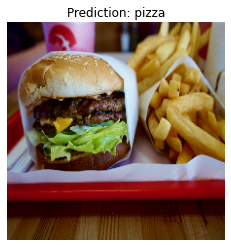

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

Our model doesn't work fine, ~40%

### Saving and loading our model

In [ ]:
# Save a model
model_10.save('saved_trained_model_10')

In [ ]:
# Load in a trined model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 17s 216ms/step - loss: 1.7943 - accuracy: 0.3816


[1.794317603111267, 0.3815999925136566]

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 1.7943 - accuracy: 0.3816


[1.7943179607391357, 0.3815999925136566]